In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = yf.download("SPY AAPL",start="2020-01-01",end="2021-09-30")

[*********************100%***********************]  2 of 2 completed


In [3]:
df=data.Close.copy()

<AxesSubplot:xlabel='SPY', ylabel='AAPL'>

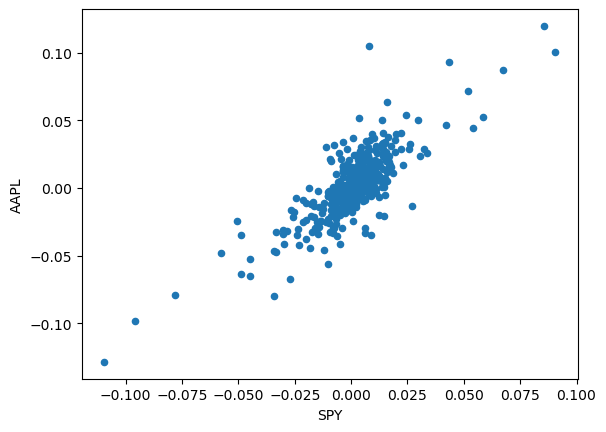

In [4]:
df.pct_change(1).plot.scatter(x="SPY",y="AAPL")

In [5]:
df_ret = df.pct_change()

In [6]:
df_ret

,AAPL,SPY
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.009722,-0.007572
2020-01-06,0.007968,0.003815
2020-01-07,-0.004703,-0.002812
2020-01-08,0.016086,0.005330
...,...,...
2021-09-23,0.006719,0.012150
2021-09-24,0.000613,0.001647
2021-09-27,-0.010550,-0.002861


In [7]:
X=df_ret.AAPL
y=df_ret.SPY

In [9]:
X.dropna(inplace=True)
y.dropna(inplace=True)

In [10]:
m,c = np.polyfit(X,y,1)

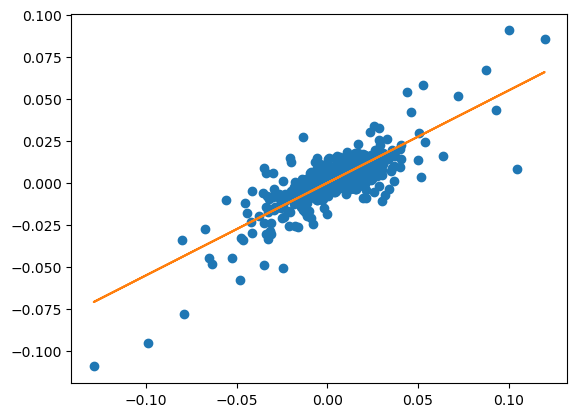

In [11]:
plt.plot(X,y,'o')
plt.plot(X,m*X+c)

# we can balance value

In [12]:
df_ret[(df_ret.SPY<-0.075)]
# covid situation

,AAPL,SPY
Date,,
2020-03-09,-0.079092,-0.078094
2020-03-12,-0.098755,-0.095677
2020-03-16,-0.128647,-0.109424


In [14]:
df_ret= df_ret[~(df_ret.SPY< -0.075)]

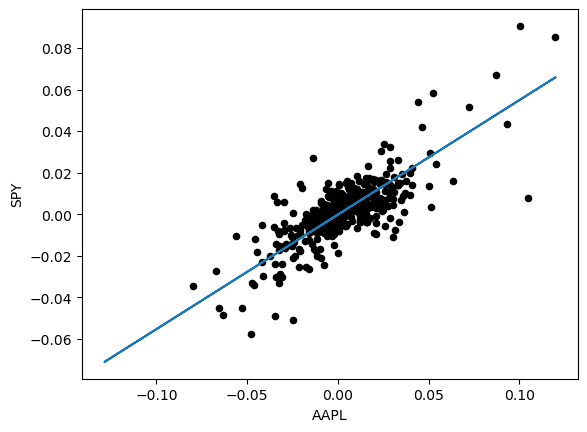

In [16]:
m,c=np.polyfit(X,y,1)
df_ret.plot.scatter(x="AAPL",y='SPY', c='k')
plt.plot(X,m*X+c)

In [17]:
df_ret.loc[(df_ret['AAPL']>0.1)&(df_ret['SPY']<0.02)]

,AAPL,SPY
Date,,
2020-07-31,0.104689,0.007902


In [18]:
df_ret.loc[df_ret.index != '2020-07-31']

,AAPL,SPY
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.009722,-0.007572
2020-01-06,0.007968,0.003815
2020-01-07,-0.004703,-0.002812
2020-01-08,0.016086,0.005330
...,...,...
2021-09-23,0.006719,0.012150
2021-09-24,0.000613,0.001647
2021-09-27,-0.010550,-0.002861


In [20]:
(df_ret['AAPL']>0.1)&(df_ret['SPY']<0.02)

Date
2020-01-02    False
2020-01-03    False
2020-01-06    False
2020-01-07    False
2020-01-08    False
              ...  
2021-09-23    False
2021-09-24    False
2021-09-27    False
2021-09-28    False
2021-09-29    False
Length: 437, dtype: bool

In [19]:
test=df_ret.loc[~((df_ret['AAPL']>0.1)&(df_ret['SPY']<0.02))]

In [21]:
test

,AAPL,SPY
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.009722,-0.007572
2020-01-06,0.007968,0.003815
2020-01-07,-0.004703,-0.002812
2020-01-08,0.016086,0.005330
...,...,...
2021-09-23,0.006719,0.012150
2021-09-24,0.000613,0.001647
2021-09-27,-0.010550,-0.002861


In [22]:
test.loc['2020-07-31']
# will return error not found cause we remove that

KeyError: '2020-07-31'

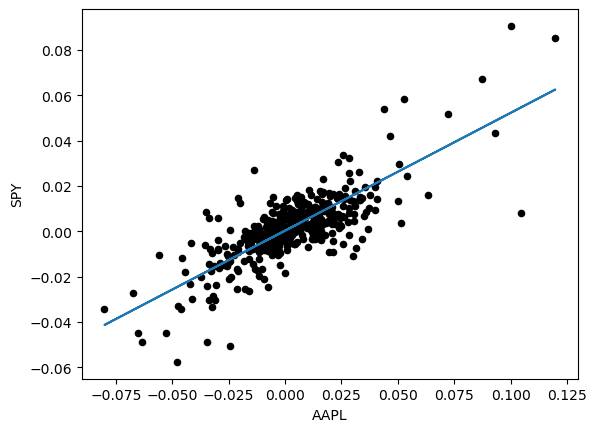

In [23]:
X= test.AAPL.dropna()
y= test.SPY.dropna()
m,c = np.polyfit(X,y,1)
df_ret.plot.scatter(x="AAPL",y='SPY', c='k')
plt.plot(X,m*X+c)

In [25]:
df_ret[(df_ret.SPY>.06)]

,AAPL,SPY
Date,,
2020-03-13,0.119808,0.085486
2020-03-24,0.100325,0.090603
2020-04-06,0.087237,0.067166
